In [22]:
from ppget.source import ModelSource

start_date = "2007-07-01"
end_date = "2008-07-01"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: 10T, Name: Global_active_power, dtype: float64)

In [23]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.6812
2007-07-01 00:10:00    2.6502
2007-07-01 00:20:00    2.6266
2007-07-01 00:30:00    2.5242
2007-07-01 00:40:00    2.6000
Freq: 10T, Name: Global_active_power, dtype: float64

In [24]:
from ppget.datastructure import DatasetBuilder, TrainSplit

WINDOW = 4
MODEL_NAME = "model/baseline/"

builder = DatasetBuilder(series, data_split=TrainSplit(), window_size=WINDOW)

S = builder.build_splits()

S["training"]["X"].shape, S["training"]["y"].shape, S["test"]["X"].shape, S["test"]["y"].shape

((47430, 4, 1), (47430,), (5270, 4, 1), (5270,))

In [25]:
len(S["test"]["y"])

5270

In [26]:
import pandas as pd
import numpy as np

test_results = pd.DataFrame(data={"Predictions":  S["test"]["y"], "Ground Truth": np.roll(S["test"]["y"], -1)})
test_results.head()

,Predictions,Ground Truth
0,0.071953,0.076587
1,0.076587,0.065371
2,0.065371,0.061949
3,0.061949,0.077062
4,0.077062,0.071407


In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

model_score = sqrt(mean_squared_error(test_results["Ground Truth"][:-1], test_results["Predictions"][:-1]))
model_size = 0
print(f"Model Score (RMSE): {model_score} (normalized [0,1]), Model Size: {model_size} bytes")

Model Score (RMSE): 0.06642535526298057 (normalized [0,1]), Model Size: 0 bytes


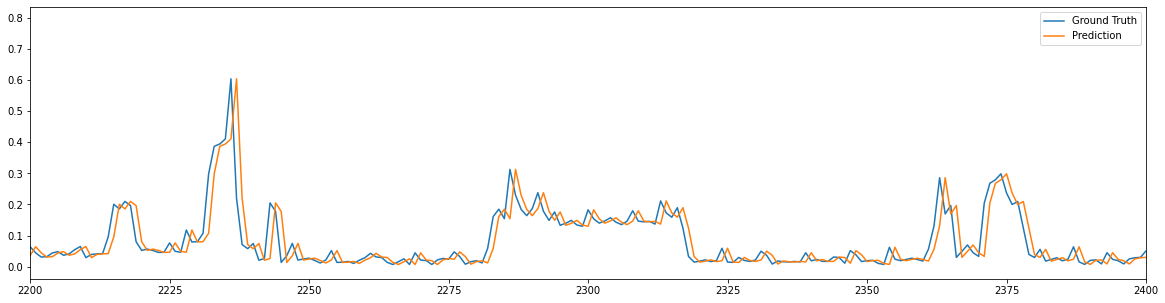

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(test_results["Ground Truth"], label="Ground Truth")
ax.plot(test_results["Predictions"], label="Prediction")

plt.legend(["Ground Truth", "Prediction"])
plt.xlim([2200, 2400])
plt.show()